In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [23]:
data = pd.read_csv("weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

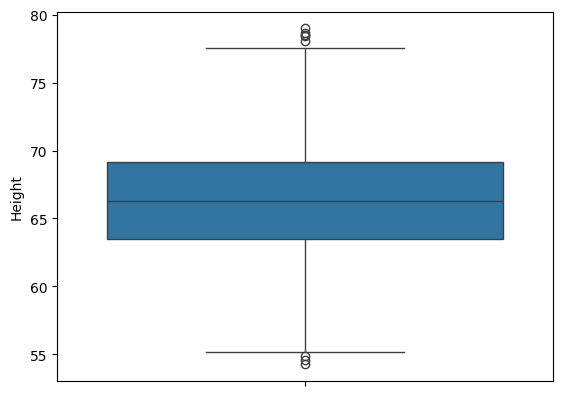

In [28]:
# sns.distplot(data["Height"])
sns.boxplot(data["Height"])

In [21]:
min_limit = data["Height"].quantile(0.01)
max_limit = data["Height"].quantile(0.99)


In [9]:
max_limit

74.7857900583366

In [12]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [30]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [22]:
data[(data["Height"]>max_limit) | (data["Height"]<min_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [24]:
#Trimming
data1 = data[(data["Height"]<max_limit) & (data["Height"]>min_limit)]
data1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Capping

In [26]:
#Capping
new_data = data.copy()
new_data["Height"] = np.where(data["Height"]<min_limit , min_limit , np.where(data["Height"]>max_limit , max_limit , data["Height"]))
new_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\Satyam\AppData\Local\Temp\ipykernel_28556\4195842642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Height"])
C:\Users\Satyam\AppData\Local\Temp\ipykernel_28556\4195842642.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["Height"])


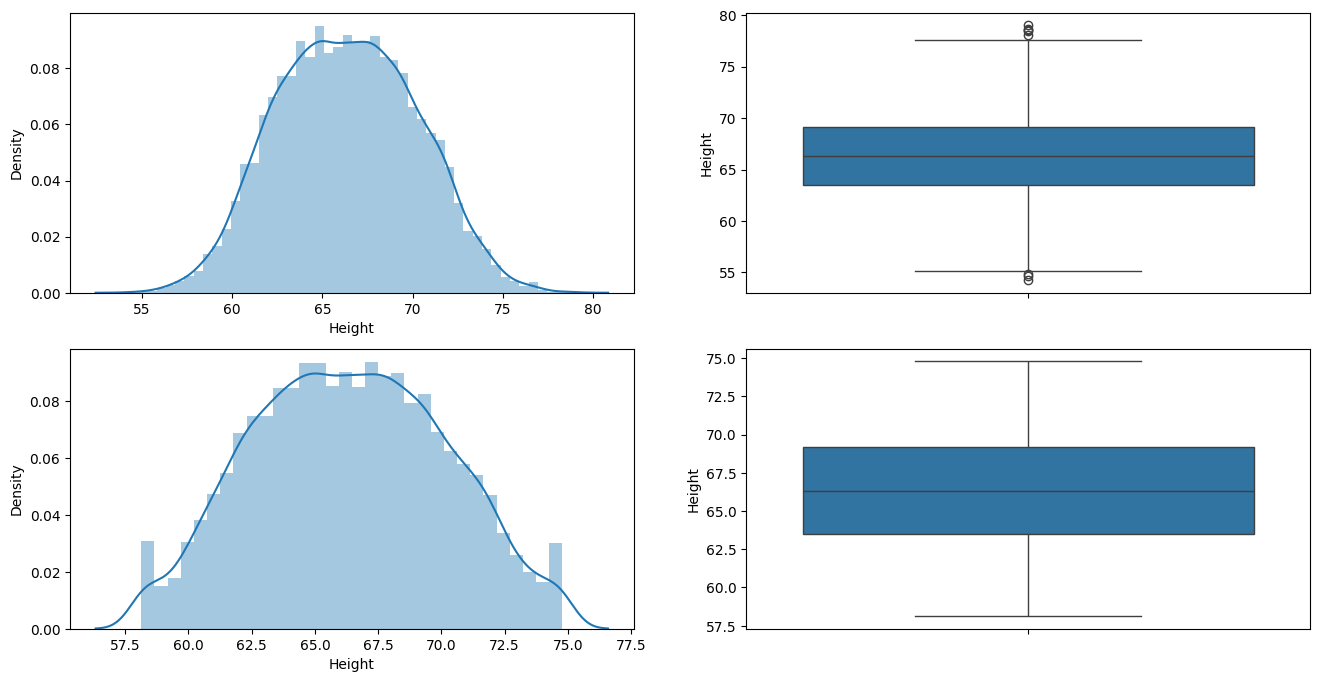

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["Height"])

plt.subplot(2,2,2)
sns.boxplot(data["Height"])

plt.subplot(2,2,3)
sns.distplot(new_data["Height"])

plt.subplot(2,2,4)
sns.boxplot(new_data["Height"])

plt.show()